#### Importação das bibliotecas

In [270]:
# Importação da biblioteca para criação dos dataframes
import pandas as pd
# Importação da biblioteca para manipulação de arrays numpy
import numpy as np
# Importação da biblioteca para visualização de gráficos
%matplotlib inline
import matplotlib.pyplot as plt
# Desativação de warning em casos de falso positivo para manipulação de dataframes
pd.options.mode.chained_assignment = None
# Importação das bibliotecas para o Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing

#### Carregamento do dataset `application_record.csv`

In [271]:
app_record_df = pd.read_csv("C:\\Users\\Goldberg\\TCC\\application_record.csv", encoding = "UTF-8")

In [272]:
app_record_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [273]:
# Quantidade de consumidores
app_record_df[app_record_df.ID.notnull()]['ID'].unique().shape

(438510,)

In [274]:
# Observando os tipos de dados
app_record_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [275]:
# Verificando a quantidade de nulos por coluna no dataset
app_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

É observado que o dataset possui muitos valores nulos para a coluna `OCUPATION_TYPE`, que consequentemente será desconsiderada

In [276]:
# Removendo coluna OCCUPATION_TYPE
app_record_df.drop(['OCCUPATION_TYPE'], axis=1, inplace=True)

In [277]:
# Identificando linhas que possuam ID duplicado
app_record_df[app_record_df.duplicated(['ID'])].shape

(47, 17)

In [278]:
# Foram identificadas 47 linhas com ID duplicado, será realizada a limpeza desses registros
app_record_df = app_record_df.drop_duplicates('ID', keep='last')

In [279]:
# Conferindo a remoção dos duplicados
app_record_df[app_record_df.duplicated(['ID'])].shape

(0, 17)

In [280]:
app_record_df['DAYS_BIRTH']

0        -12005
1        -12005
2        -21474
3        -19110
4        -19110
          ...  
438552   -22717
438553   -15939
438554    -8169
438555   -21673
438556   -18858
Name: DAYS_BIRTH, Length: 438510, dtype: int64

In [281]:
# Como visto no detalhamento do dataset, os valores para DAYS_BIRTH (basicamente idade) estão negativos e em dias,
# será feita a transformação para anos até mesmo para diminuir a ordem desses valores e não influenciar no nosso
# aprendizado de máquina
app_record_df['DAYS_BIRTH'] = round(app_record_df['DAYS_BIRTH']/-365,0)
app_record_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [282]:
app_record_df['AGE_YEARS']

0         33.0
1         33.0
2         59.0
3         52.0
4         52.0
          ... 
438552    62.0
438553    44.0
438554    22.0
438555    59.0
438556    52.0
Name: AGE_YEARS, Length: 438510, dtype: float64

In [283]:
# A mesma operação de conversão será feita para a coluna DAYS_EMPLOYED, com uma pequena diferença pois teremos valores
# positivos. Valores positivos, assim como zerados, representam desemprego, como documentado no metadados do dataset, 
# então essa questão será tratada primeiro
app_record_df[app_record_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [284]:
# Pelo apresentado, temos apenas um valor positivo, que representaria desemprego, será feita a transformação para 0
app_record_df.loc[app_record_df['DAYS_EMPLOYED'] > 0] = 0

In [285]:
# Conferindo a atribuição do novo valor
app_record_df[app_record_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([], dtype=int64)

In [286]:
# A mesma operação de conversão para anos será feita para a coluna DAYS_EMPLOYED
app_record_df['DAYS_EMPLOYED'] = abs(round(app_record_df['DAYS_EMPLOYED']/-365,0))
app_record_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

In [287]:
# Conferindo os valores
app_record_df['YEARS_EMPLOYED']

0         12.0
1         12.0
2          3.0
3          8.0
4          8.0
          ... 
438552     0.0
438553     8.0
438554     1.0
438555     0.0
438556     3.0
Name: YEARS_EMPLOYED, Length: 438510, dtype: float64

In [288]:
# Para realizar uma análise sobre valores distintos das colunas numéricas, primeiro deve-se reunir quais são as colunas 
# numéricas
colunas_numericas = app_record_df.select_dtypes(include=np.number).columns.tolist()

In [289]:
# As colunas que possuem características como email, telefone e celular serão desconsideradas por ser uma feature 
# irrelevante nos dias atuais
app_record_df.drop(['FLAG_EMAIL', 'FLAG_PHONE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE'], axis=1, inplace=True)

In [290]:
# Analisando a flag FLAG_OWN_CAR
app_record_df['FLAG_OWN_CAR'].unique()

array(['Y', 'N', 0], dtype=object)

In [291]:
# Percebe-se que o 0 é um dado discrepante, será feita sua remoção
app_record_df = app_record_df[app_record_df.FLAG_OWN_CAR != 0]

In [292]:
# Analisando a flag FLAG_OWN_REALTY
app_record_df['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

#### Analisando outliers nas colunas
Um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.
#### Interquartile Range (IQR = Q3 - Q1)
Na coleta de dados podem ocorrer erros de arredondamentos ou erros de observação. Estes dados são considerados discrepantes dentro de uma mesma amostra e podem levar a erros nas análises sobre a distribuição dos dados. Portanto, estabelece-se o critério de limite inferior e de limite superior nos quartis (os dados que estiverem além destes limites são considerados discrepantes).

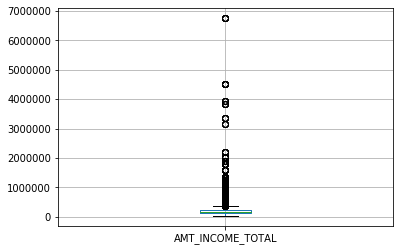

In [293]:
# Visualizando boxplot da coluna AMT_INCOME_TOTAL
app_record_df.boxplot(column='AMT_INCOME_TOTAL')

In [294]:
# Removendo outliers referente à coluna AMT_INCOME_TOTAL usando o Interquartile Range (IQR) 
Q1 = app_record_df.AMT_INCOME_TOTAL.quantile(0.25)
Q3 = app_record_df.AMT_INCOME_TOTAL.quantile(0.75)
IQR = Q3 - Q1
print('IQR: ', IQR)

app_record_df = app_record_df[(app_record_df['AMT_INCOME_TOTAL']>(Q1 - 1.5 * IQR)) & 
                              (app_record_df['AMT_INCOME_TOTAL']<(Q3 + 1.5 * IQR))]

IQR:  90000.0


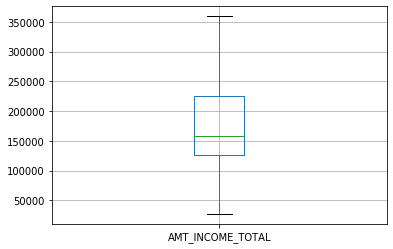

In [295]:
# Conferindo a remoção dos outliers da coluna AMT_INCOME_TOTAL
app_record_df.boxplot(column='AMT_INCOME_TOTAL')

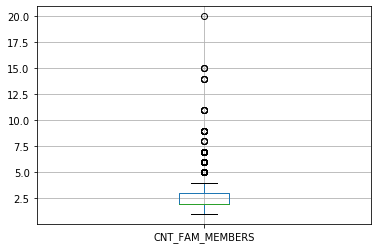

In [296]:
# Visualizando boxplot da coluna CNT_FAM_MEMBERS
app_record_df.boxplot(column='CNT_FAM_MEMBERS')

In [297]:
# Removendo outliers referente à coluna CNT_FAM_MEMBERS usando o Interquartile Range (IQR) 
Q1 = app_record_df.CNT_FAM_MEMBERS.quantile(0.25)
Q3 = app_record_df.CNT_FAM_MEMBERS.quantile(0.75)
IQR = Q3 - Q1
print('IQR: ', IQR)

app_record_df = app_record_df[(app_record_df['CNT_FAM_MEMBERS']>(Q1 - 1.5 * IQR)) & 
                              (app_record_df['CNT_FAM_MEMBERS']<(Q3 + 1.5 * IQR))]

IQR:  1.0


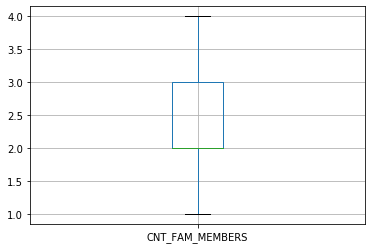

In [298]:
# Conferindo a remoção de outliers da coluna CNT_FAM_MEMBERS
app_record_df.boxplot(column='CNT_FAM_MEMBERS')

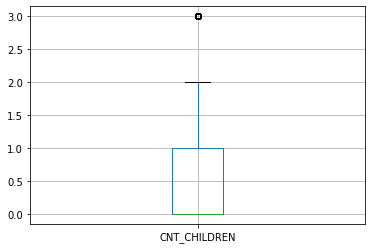

In [299]:
# Visualizando boxplot da coluna CNT_CHILDREN
app_record_df.boxplot(column='CNT_CHILDREN')

In [300]:
# Removendo outliers referente à coluna CNT_CHILDREN usando o Interquartile Range (IQR) 
Q1 = app_record_df.CNT_CHILDREN.quantile(0.25)
Q3 = app_record_df.CNT_CHILDREN.quantile(0.75)
IQR = Q3 - Q1
print('IQR: ', IQR)

app_record_df = app_record_df[(app_record_df['CNT_CHILDREN']>(Q1 - 1.5 * IQR)) & 
                              (app_record_df['CNT_CHILDREN']<(Q3 + 1.5 * IQR))]

IQR:  1.0


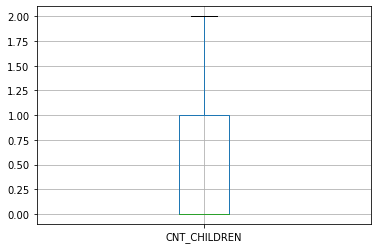

In [301]:
# Conferindo a remoção de outliers da coluna CNT_CHILDREN
app_record_df.boxplot(column='CNT_CHILDREN')

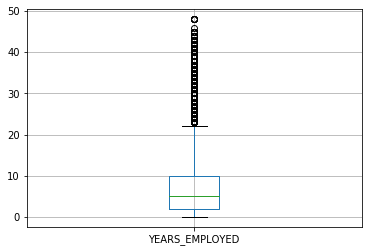

In [302]:
# Visualizando boxplot da coluna YEARS_EMPLOYED
app_record_df.boxplot(column='YEARS_EMPLOYED')

In [303]:
# Removendo outliers referente à coluna YEARS_EMPLOYED usando o Interquartile Range (IQR) 
Q1 = app_record_df.YEARS_EMPLOYED.quantile(0.25)
Q3 = app_record_df.YEARS_EMPLOYED.quantile(0.75)
IQR = Q3 - Q1
print('IQR: ', IQR)

app_record_df = app_record_df[(app_record_df['YEARS_EMPLOYED']>(Q1 - 1.5 * IQR)) & 
                              (app_record_df['YEARS_EMPLOYED']<(Q3 + 1.5 * IQR))]

IQR:  8.0


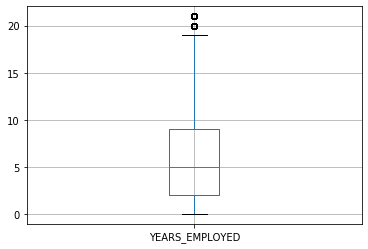

In [304]:
# Conferindo a remoção de outliers da coluna YEARS_EMPLOYED
app_record_df.boxplot(column='YEARS_EMPLOYED')

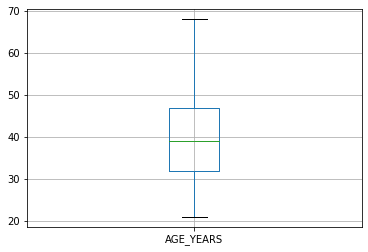

In [305]:
# Visualizando boxplot da coluna AGE_YEARS
app_record_df.boxplot(column='AGE_YEARS')

In [306]:
app_record_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438547,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,30.0,7.0,2.0
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,34.0,6.0,3.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44.0,8.0,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22.0,1.0,1.0


#### Carregamento do dataset `credit_record`

In [307]:
cred_record_df = pd.read_csv("C:\\Users\\Goldberg\\TCC\\credit_record.csv", encoding = "UTF-8")

In [308]:
cred_record_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [309]:
# Observando os tipos de dados
cred_record_df.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [310]:
# Verificando valores nulos no dataset
cred_record_df.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [311]:
# Exibindo a quantidade de registros para cada valor de STATUS
cred_record_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [312]:
# Como evidenciado na documentação, valores C, X e 0 representam clientes em dia, enquanto que 1-5 representam clientes
# em atraso, será feita essa atribuição de característica. Agora, para clientes em dia
cred_record_df['STATUS'].replace(['C', 'X'],0, inplace=True)

In [313]:
# Para clientes em atraso
cred_record_df['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [314]:
cred_record_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [315]:
# Transformando a coluna STATUS para int para que se possa realizar a agregação posteriormente
cred_record_df['STATUS'] = cred_record_df['STATUS'].astype('int')

In [316]:
# Agora, será feita a agregação desses dados por ID, para que se tenha um único valor de STATUS para cada cliente
cred_record_df_grouped = cred_record_df.groupby("ID")

In [317]:
max_value_grouped = cred_record_df_grouped.max()

In [318]:
cred_record_df_final = max_value_grouped.reset_index()

In [319]:
# Conferindo quantidade de adimplentes e inadimplentes
cred_record_df_final['STATUS'].value_counts()

0    40635
1     5350
Name: STATUS, dtype: int64

In [320]:
# Removendo coluna MONTHS_BALANCE
cred_record_df_final.drop(['MONTHS_BALANCE'], axis=1, inplace=True)

In [321]:
cred_record_df_final

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


Merge entre os datasets pela coluna `ID`

In [322]:
df_final = pd.merge(app_record_df, cred_record_df_final, on="ID")

In [323]:
df_final

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26433,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48.0,7.0,2.0,1
26434,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34.0,4.0,2.0,1
26435,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34.0,4.0,2.0,1
26436,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.0,2.0,2.0,1


In [324]:
# Conferindo valores nulos
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26438 entries, 0 to 26437
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   26438 non-null  int64  
 1   CODE_GENDER          26438 non-null  object 
 2   FLAG_OWN_CAR         26438 non-null  object 
 3   FLAG_OWN_REALTY      26438 non-null  object 
 4   CNT_CHILDREN         26438 non-null  int64  
 5   AMT_INCOME_TOTAL     26438 non-null  float64
 6   NAME_INCOME_TYPE     26438 non-null  object 
 7   NAME_EDUCATION_TYPE  26438 non-null  object 
 8   NAME_FAMILY_STATUS   26438 non-null  object 
 9   NAME_HOUSING_TYPE    26438 non-null  object 
 10  AGE_YEARS            26438 non-null  float64
 11  YEARS_EMPLOYED       26438 non-null  float64
 12  CNT_FAM_MEMBERS      26438 non-null  float64
 13  STATUS               26438 non-null  int32  
dtypes: float64(4), int32(1), int64(2), object(7)
memory usage: 2.9+ MB


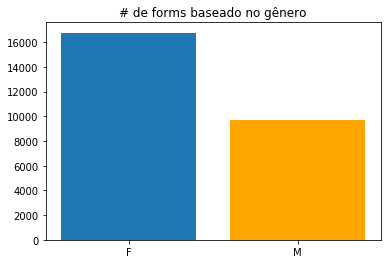

In [325]:
# O gráfico abaixo evidencia que a maior quantidade de formulários preenchidos é feito pelo sexo feminino
plt.bar(df_final['CODE_GENDER'].value_counts().index, df_final['CODE_GENDER'].value_counts(), 
        color=['#1F77B4','orange'])
plt.title('# de forms baseado no gênero')
plt.show()

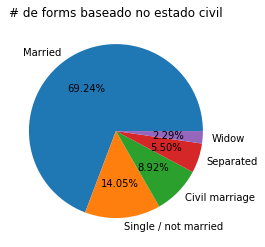

In [326]:
# O gráfico abaixo evidencia que a maior quantidade de formulários preenchidos é feito por pessoas casadas (married)
plt.pie(df_final['NAME_FAMILY_STATUS'].value_counts(), 
        labels=df_final['NAME_FAMILY_STATUS'].value_counts().index, 
        autopct='%1.2f%%')
plt.title('# de forms baseado no estado civil')
plt.show()

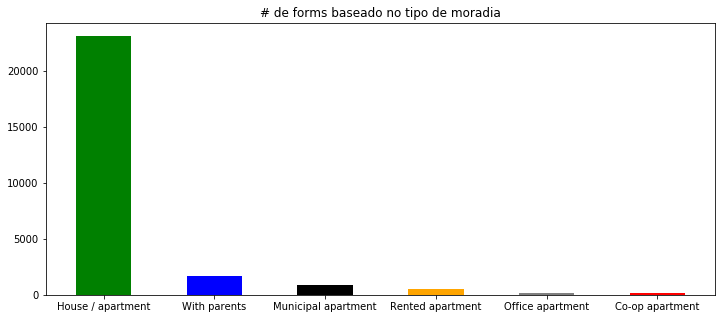

In [327]:
# O gráfico abaixo evidencia que a maior quantidade de formulários preenchidos é feito por pessoas que moram em casas
# ou apartamentos não alugados
plt.figure(figsize=(12,5))
plt.bar(df_final['NAME_HOUSING_TYPE'].value_counts().index, 
        df_final['NAME_HOUSING_TYPE'].value_counts(), 
        width=0.5, color=['green', 'blue', 'black', 'orange','gray', 'red'])
plt.title('# de forms baseado no tipo de moradia')
plt.show()

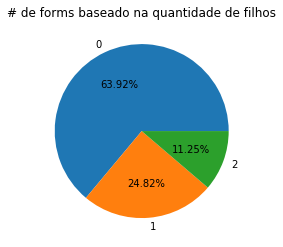

In [328]:
# O gráfico abaixo evidencia que a maior quantidade de formulários preenchidos é feito por pessoas que não possuem
# filhos
plt.pie(df_final['CNT_CHILDREN'].value_counts(), 
        labels=df_final['CNT_CHILDREN'].value_counts().index, 
        autopct='%1.2f%%')
plt.title('# de forms baseado na quantidade de filhos')
plt.show()

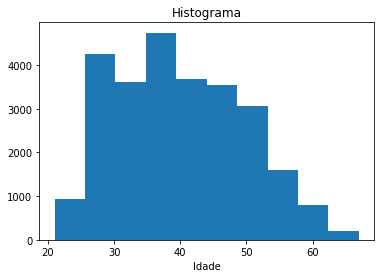

In [329]:
# O gráfico abaixo evidencia qual idade é mais recorrente na busca por crédito
plt.hist(df_final['AGE_YEARS'], bins=10)
plt.xlabel('Idade')
plt.title('Histograma')
plt.show()

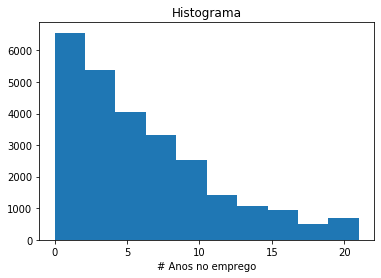

In [330]:
# O gráfico abaixo evidencia que a maior quantidade de formulários preenchidos é feito por pessoas que estão de 0 a 5 anos
# empregadas
plt.hist(df_final['YEARS_EMPLOYED'], bins=10)
plt.xlabel('# Anos no emprego')
plt.title('Histograma')
plt.show()

#### Adequando o dataset para o aprendizado de máquina

In [331]:
# Observando as colunas que precisam ser convertidas, ou seja, do tipo object
df_final.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
AGE_YEARS              float64
YEARS_EMPLOYED         float64
CNT_FAM_MEMBERS        float64
STATUS                   int32
dtype: object

In [332]:
# Selecionando apenas colunas categóricas para posterior transformação em atributos numéricos
categorical_columns = df_final.select_dtypes(exclude=[np.number]).keys()

In [333]:
# Instanciação da classe LabelEncoder
label_encoder = preprocessing.LabelEncoder()

In [334]:
# Transformando colunas categóricas em númericas através de uma iteração pelas colunas do tipo object
for column in categorical_columns:
    df_final[column] = label_encoder.fit_transform(df_final[column])

In [335]:
df_final

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008806,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
1,5008808,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
2,5008809,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
3,5008810,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
4,5008811,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26433,5149828,1,1,1,0,315000.0,4,4,1,1,48.0,7.0,2.0,1
26434,5149834,0,0,1,0,157500.0,0,1,1,1,34.0,4.0,2.0,1
26435,5149838,0,0,1,0,157500.0,1,1,1,1,34.0,4.0,2.0,1
26436,5150049,0,0,1,0,283500.0,4,4,1,1,49.0,2.0,2.0,1


In [336]:
# Apresentacao da correlacao entre as colunas do dataframe final
df_final.corr()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
ID,1.000000,0.009390,-0.027281,-0.097400,0.025846,-0.047490,0.011132,-0.004126,-0.002067,0.021124,-0.031436,-0.013814,0.026411,0.004379
CODE_GENDER,0.009390,1.000000,0.335753,-0.034410,0.021235,0.209469,0.063928,0.061270,-0.048454,0.049094,-0.105735,-0.071796,0.048130,0.017531
FLAG_OWN_CAR,-0.027281,0.335753,1.000000,0.003443,0.067091,0.206144,0.001617,-0.059804,-0.107800,0.005532,-0.069801,-0.013832,0.118969,-0.017695
FLAG_OWN_REALTY,-0.097400,-0.034410,0.003443,1.000000,0.017521,0.025030,-0.012538,0.003838,0.014774,-0.178842,0.086543,-0.014101,0.011804,-0.027490
CNT_CHILDREN,0.025846,0.021235,0.067091,0.017521,1.000000,-0.011164,0.025489,-0.041177,-0.170171,0.007119,-0.263360,-0.008412,0.880922,-0.000925
AMT_INCOME_TOTAL,-0.047490,0.209469,0.206144,0.025030,-0.011164,1.000000,-0.133509,-0.186853,0.035136,-0.014048,0.017744,0.025210,-0.028311,0.016755
NAME_INCOME_TYPE,0.011132,0.063928,0.001617,-0.012538,0.025489,-0.133509,1.000000,0.106278,-0.001874,-0.006966,0.019220,0.029071,0.027484,-0.021653
NAME_EDUCATION_TYPE,-0.004126,0.061270,-0.059804,0.003838,-0.041177,-0.186853,0.106278,1.000000,-0.015904,-0.040154,0.152063,0.023403,-0.027309,0.001773
NAME_FAMILY_STATUS,-0.002067,-0.048454,-0.107800,0.014774,-0.170171,0.035136,-0.001874,-0.015904,1.000000,0.028608,0.016198,-0.033726,-0.566134,-0.000475
NAME_HOUSING_TYPE,0.021124,0.049094,0.005532,-0.178842,0.007119,-0.014048,-0.006966,-0.040154,0.028608,1.000000,-0.186470,-0.057664,-0.017407,0.010442


In [337]:
# Parte do dataframe com as features, sendo desprezada a característica alvo (STATUS)
df_final.iloc[:,1:13]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
1,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
3,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
4,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26433,1,1,1,0,315000.0,4,4,1,1,48.0,7.0,2.0
26434,0,0,1,0,157500.0,0,1,1,1,34.0,4.0,2.0
26435,0,0,1,0,157500.0,1,1,1,1,34.0,4.0,2.0
26436,0,0,1,0,283500.0,4,4,1,1,49.0,2.0,2.0


### Separando os dados em conjuntos de treinamento e testes

In [338]:
# Separando o dataset entre treinamento e validação, por padrão, tem-se 75% treinamento e 25% validação
X_train, X_test, y_train, y_test = train_test_split(
                                df_final.iloc[:,1:13], df_final['STATUS'], 
                                test_size=0.4, random_state=0)

In [339]:
# Criando lista com os nomes das classes presentes
status_names = ['adimplente', 'inadimplente']

### Aprendizado de máquina

### Modelo `Naïve Bayes`

In [340]:
# Instanciando o modelo e calculando a predição para o conjunto de teste
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [341]:
# Aqui, e nos demais modelos, será usada a validação cruzada para avaliar o desempenho do modelo com parâmetro k=5, ou seja, 
# o conjunto de treinamento será divido em 5 grupos, em que o grupo de teste será alterado a cada iteração do modelo. 
scores = cross_val_score(gnb, X_train, y_train, cv=5)

In [342]:
print("Acurácia (base de treinamento):", scores.mean())

Acurácia (base de treinamento): 0.876686429358049


In [343]:
ac_gnb = gnb.score(X_test, y_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia de previsão: 0.8821860816944024


In [344]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[9330    0]
 [1246    0]]


In [345]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.88      1.00      0.94      9330
inadimplente       0.00      0.00      0.00      1246

    accuracy                           0.88     10576
   macro avg       0.44      0.50      0.47     10576
weighted avg       0.78      0.88      0.83     10576



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo `Decision Tree (Árvore de Decisão)`

In [346]:
# Instanciando o modelo 
tree_status = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight=None)
tree_status = tree_status.fit(X_train, y_train)

In [347]:
scores = cross_val_score(tree_status, X_train, y_train, cv=5)
print("Acurácia (base de treinamento):", scores.mean())

Acurácia (base de treinamento): 0.8596643177440167


In [348]:
# Calculando a predição para o conjunto de teste
y_pred = tree_status.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia de previsão: 0.8745272314674736


In [349]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[8898  432]
 [ 895  351]]


In [350]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.91      0.95      0.93      9330
inadimplente       0.45      0.28      0.35      1246

    accuracy                           0.87     10576
   macro avg       0.68      0.62      0.64     10576
weighted avg       0.85      0.87      0.86     10576



### Modelo `XGBoost`

In [351]:
# Instanciando o modelo
XGB_model = XGBClassifier()
XGB_model = XGB_model.fit(X_train, y_train)

[18:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [352]:
scores = cross_val_score(XGB_model, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia (base de treinamento):  0.8756772245646094


In [353]:
print('Acurácia de previsão: ', XGB_model.score(X_test, y_test))

Acurácia de previsão:  0.8860627836611196


In [354]:
# Calculando a predição para o conjunto de teste
predicao_xgboost = XGB_model.predict(X_test)

In [355]:
print('Matriz de confusão: \n', confusion_matrix(y_test, predicao_xgboost))

Matriz de confusão: 
 [[9228  102]
 [1103  143]]


In [356]:
print(classification_report(y_test, predicao_xgboost, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.89      0.99      0.94      9330
inadimplente       0.58      0.11      0.19      1246

    accuracy                           0.89     10576
   macro avg       0.74      0.55      0.57     10576
weighted avg       0.86      0.89      0.85     10576



### Modelo `Random Forest (Floresta Aleatória)`

In [357]:
# Instanciando o modelo e calculando a predição para o conjunto de teste
clf=RandomForestClassifier(n_estimators=200, class_weight=None)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [358]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.8755515384575642


In [359]:
print("Acurácia de previsão: ", accuracy_score(y_test, y_pred))

Acurácia de previsão:  0.8838880484114977


In [360]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[8993  337]
 [ 891  355]]


In [361]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.91      0.96      0.94      9330
inadimplente       0.51      0.28      0.37      1246

    accuracy                           0.88     10576
   macro avg       0.71      0.62      0.65     10576
weighted avg       0.86      0.88      0.87     10576



### Modelo `SVM (Support Vector Machine)`

In [362]:
# Instanciando o modelo
svm_model = svm.SVC(probability=True)

In [363]:
svm_model.fit(X_train,y_train)

SVC(probability=True)

In [364]:
# Calculando a predição para o conjunto de teste
y_pred=svm_model.predict(X_test)

In [365]:
scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.876686429358049


In [366]:
print("Acurácia de previsão: ", svm_model.score(X_test, y_test))

Acurácia de previsão:  0.8821860816944024


In [367]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[9330    0]
 [1246    0]]


In [368]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.88      1.00      0.94      9330
inadimplente       0.00      0.00      0.00      1246

    accuracy                           0.88     10576
   macro avg       0.44      0.50      0.47     10576
weighted avg       0.78      0.88      0.83     10576



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observa-se que o Modelo XGBoost se mostra com melhor desempenho na métrica precisão para casos de inadimplência, porém
constata-se que o recall (objetivo do projeto) é baixo, o que pode ocorrer pelo desbalanceamento do nosso dataset, ponto que será abordado adiante.

#### Uma forma de balancear o dataset é aumentando o número de amostras da classe minoritária apenas no conjunto de treinamento utilizando SMOTE (Synthetic Minority Oversampling Technique), que é uma técnica de sobre-amostragem em que amostras sintéticas são geradas para a classe minoritária.

In [369]:
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

In [370]:
y_train.value_counts()

0    13906
1     1956
Name: STATUS, dtype: int64

In [371]:
# Agora temos quantidade de amostras iguais de inadimplentes e adimplentes para realizarmos o treinamento
y_train_SMOTE.value_counts()

1    13906
0    13906
Name: STATUS, dtype: int64

In [372]:
# Array para armazenar os recalls
recalls = []

### Modelo `Naïve Bayes` - dados balanceados

In [373]:
# Instanciando o modelo e calculando a predição para o conjunto de teste
gnb_balanced = GaussianNB()
gnb_balanced = gnb_balanced.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = gnb_balanced.predict(X_test)

In [374]:
pipeline = make_pipeline(smt, gnb_balanced)

In [375]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.32322695155252645


In [376]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia de previsão: 0.3431354009077156


In [377]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[2722 6608]
 [ 339  907]]


In [378]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.89      0.29      0.44      9330
inadimplente       0.12      0.73      0.21      1246

    accuracy                           0.34     10576
   macro avg       0.50      0.51      0.32     10576
weighted avg       0.80      0.34      0.41     10576



In [379]:
recalls.append(['Naive Bayes - SMOTE', recall_score(y_test, y_pred)])

### Modelo `Decision Tree` - dados balanceados - SMOTE

In [380]:
# Instanciando o modelo
tree_status_balanced = DecisionTreeClassifier(random_state=0, 
                                              criterion='entropy', class_weight=None)
tree_status_balanced = tree_status_balanced.fit(X_train_SMOTE, 
                                                y_train_SMOTE)

In [381]:
pipeline = make_pipeline(smt, tree_status_balanced)

In [382]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.8427683691487404


In [383]:
# Calculando a predição para o conjunto de teste
y_pred = tree_status_balanced.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia de previsão: 0.8561838124054463


In [384]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[8561  769]
 [ 752  494]]


In [385]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.92      0.92      0.92      9330
inadimplente       0.39      0.40      0.39      1246

    accuracy                           0.86     10576
   macro avg       0.66      0.66      0.66     10576
weighted avg       0.86      0.86      0.86     10576



In [386]:
recalls.append(['Decision Tree - SMOTE', recall_score(y_test, y_pred)])

### Uma outra abordagem válida é a utilização do hiperparâmetro “class_weight” presente em alguns algoritmos como Decision Tree, Random Forest e SVM. Por padrão, o valor de class_weight = None, ou seja, ambas as classes recebem pesos iguais. Fora isso, pode-se fornecer o valor "balanced", ou é possível, também, passar um dicionário que contém pesos manuais para as classes. 

### Quando class_weight = “balanced”, o modelo atribui automaticamente os pesos das classes inversamente proporcionais às suas respectivas frequências. Em resumo, pesos pequenos resultam em uma pequena penalidade e uma pequena atualização dos coeficientes do modelo, enquanto pesos grandes resultam em uma grande penalidade e uma grande atualização dos coeficientes do modelo, que é o cenário ideal quando se tem classe minoritária.

### Modelo `Decision Tree` - dados balanceados - class_weight="balanced"

In [387]:
# Instanciando o modelo 
tree_status_balanced_weight = DecisionTreeClassifier(random_state=0, 
                                              criterion='entropy', class_weight='balanced')

In [388]:
tree_status_balanced_weight = tree_status_balanced_weight.fit(X_train, y_train)

In [389]:
scores = cross_val_score(tree_status_balanced_weight, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.7781488592470598


In [390]:
# Calculando a predição para o conjunto de teste
y_pred = tree_status_balanced_weight.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia de previsão: 0.7883888048411498


In [391]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[7629 1701]
 [ 537  709]]


In [392]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.93      0.82      0.87      9330
inadimplente       0.29      0.57      0.39      1246

    accuracy                           0.79     10576
   macro avg       0.61      0.69      0.63     10576
weighted avg       0.86      0.79      0.82     10576



In [393]:
recalls.append(['Decision Tree - class_weight', recall_score(y_test, y_pred)])

### Modelo `XGBoost` - dados balanceados

In [394]:
# Instanciando o modelo 
XGB_model_balanced = XGBClassifier()
XGB_model_balanced = XGB_model_balanced.fit(X_train_SMOTE, y_train_SMOTE)

[18:54:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [395]:
pipeline = make_pipeline(smt, XGB_model_balanced)

In [396]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acurácia (base de treinamento):  0.8668509996665591


In [397]:
print('Acurácia de previsão: ', XGB_model_balanced.score(X_test, y_test))

Acurácia de previsão:  0.8702723146747352


In [398]:
# Calculando a predição para o conjunto de teste
predicao_xgboost_balanced_set = XGB_model_balanced.predict(X_test)

In [399]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[7629 1701]
 [ 537  709]]


In [400]:
print(classification_report(y_test, predicao_xgboost_balanced_set, 
                            target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.90      0.95      0.93      9330
inadimplente       0.41      0.24      0.30      1246

    accuracy                           0.87     10576
   macro avg       0.66      0.60      0.62     10576
weighted avg       0.85      0.87      0.86     10576



In [401]:
recalls.append(['XGBoost - SMOTE', recall_score(y_test, predicao_xgboost_balanced_set)])

### Modelo `Random Forest (Floresta Aleatória)` - dados balanceados - SMOTE

In [402]:
# Instanciando o modelo e calculando a predição para o conjunto de teste
clf_balanced=RandomForestClassifier(n_estimators=200)
clf_balanced.fit(X_train_SMOTE,y_train_SMOTE)

y_pred=clf_balanced.predict(X_test)

In [403]:
pipeline = make_pipeline(smt, clf_balanced)

In [404]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.8563227563589223


In [405]:
print("Acurácia de previsão: ", clf_balanced.score(X_test, y_test))

Acurácia de previsão:  0.863464447806354


In [406]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[8638  692]
 [ 752  494]]


In [407]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.92      0.93      0.92      9330
inadimplente       0.42      0.40      0.41      1246

    accuracy                           0.86     10576
   macro avg       0.67      0.66      0.66     10576
weighted avg       0.86      0.86      0.86     10576



In [408]:
recalls.append(['Random Forest - SMOTE', recall_score(y_test, y_pred)])

### Modelo `Random Forest (Floresta Aleatória)` - dados balanceados - class_weight="balanced"

In [409]:
# Instanciando o modelo 
clf_balanced_weight=RandomForestClassifier(n_estimators=200, class_weight='balanced')
clf_balanced_weight.fit(X_train,y_train)

In [410]:
# Calculando a predição para o conjunto de teste
y_pred=clf_balanced_weight.predict(X_test)

In [411]:
scores = cross_val_score(clf_balanced_weight, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.8415705060311446


In [412]:
print("Acurácia de previsão: ", clf_balanced_weight.score(X_test, y_test))

Acurácia de previsão:  0.8433245083207261


In [413]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[8308 1022]
 [ 635  611]]


In [414]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.93      0.89      0.91      9330
inadimplente       0.37      0.49      0.42      1246

    accuracy                           0.84     10576
   macro avg       0.65      0.69      0.67     10576
weighted avg       0.86      0.84      0.85     10576



In [415]:
recalls.append(['Random Forest - class_weight', recall_score(y_test, y_pred)])

### Modelo `SVM (Support Vector Machine)` - dados balanceados - SMOTE

In [416]:
# Instanciando o modelo 
svm_model_balanced = svm.SVC(probability=True)

In [417]:
svm_model_balanced.fit(X_train_SMOTE,y_train_SMOTE)

SVC(probability=True)

In [418]:
# Calculando a predição para o conjunto de teste
y_pred=svm_model_balanced.predict(X_test)

In [419]:
pipeline = make_pipeline(smt, svm_model_balanced)

In [420]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.6206034602329157


In [421]:
print("Acurácia de previsão: ", svm_model_balanced.score(X_test, y_test))

Acurácia de previsão:  0.6107223903177005


In [422]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[5973 3357]
 [ 760  486]]


In [423]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.89      0.64      0.74      9330
inadimplente       0.13      0.39      0.19      1246

    accuracy                           0.61     10576
   macro avg       0.51      0.52      0.47     10576
weighted avg       0.80      0.61      0.68     10576



In [424]:
recalls.append(['SVM - SMOTE', recall_score(y_test, y_pred)])

### Modelo `SVM (Support Vector Machine)` - dados balanceados - class_weight="balanced"

In [624]:
# Instanciando o modelo
svm_model_balanced_weight = svm.SVC(probability=True, class_weight='balanced')

In [625]:
svm_model_balanced_weight.fit(X_train,y_train)

SVC(class_weight='balanced', probability=True)

In [626]:
# Calculando a predição para o conjunto de teste
y_pred=svm_model_balanced_weight.predict(X_test)

In [627]:
scores = cross_val_score(svm_model_balanced_weight, X_train, y_train, cv=5)
print('Acurácia (base de treinamento): ', scores.mean())

Acurácia (base de treinamento):  0.6328956409872231


In [628]:
print("Acurácia de previsão: ", svm_model_balanced_weight.score(X_test, y_test))

Acurácia de previsão:  0.6138426626323752


In [629]:
print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))

Matriz de confusão: 
 [[6007 3323]
 [ 761  485]]


In [630]:
print(classification_report(y_test, y_pred, target_names=status_names))

              precision    recall  f1-score   support

  adimplente       0.89      0.64      0.75      9330
inadimplente       0.13      0.39      0.19      1246

    accuracy                           0.61     10576
   macro avg       0.51      0.52      0.47     10576
weighted avg       0.80      0.61      0.68     10576



In [431]:
recalls.append(['SVM - class_weight', recall_score(y_test, y_pred)])

### Avaliação dos resultados

### A Curva ROC (Receiver Operating Characteristic) e a AUC (Area Under the Curve) são ferramentas poderosas para medir e comparar o desempenho de modelos de classificação binários, em machine learning. A Curva ROC é um gráfico simples, mas robusto, que permite estudar a variação da sensibilidade e especificidade, para diferentes pontos de corte na probabilidade estimada (thresholds). A AUC é uma medida de área que facilita a comparação entre Curvas ROC.

In [524]:
# Lista para armazenar os valores de AUC para cada modelo
auc_list = []

### Curva ROC e AUC para Naïve Bayes

In [525]:
naive_bayes_score = gnb.predict_proba(X_test)[:,1]

In [526]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, naive_bayes_score)

In [527]:
print('roc_auc_score para Naïve Bayes: ', roc_auc_score(y_test, naive_bayes_score))

roc_auc_score para Naïve Bayes:  0.522202925029978


In [528]:
auc_list.append(['Naïve Bayes', roc_auc_score(y_test, naive_bayes_score)])

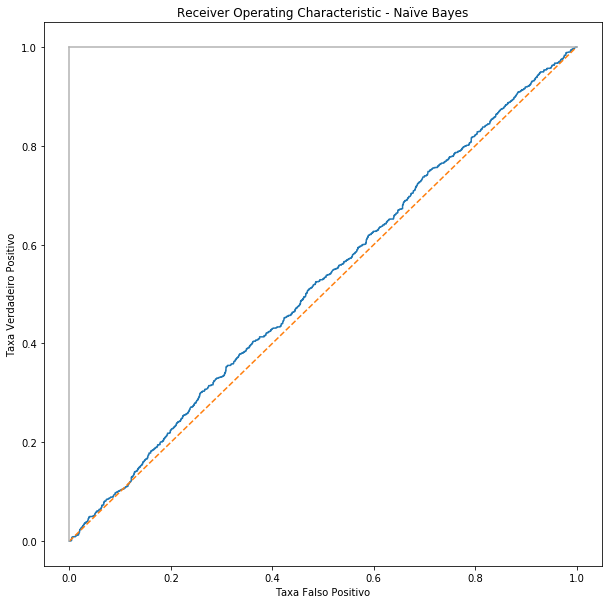

In [529]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naïve Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para Decision Tree 

In [530]:
tree_score = tree_status.predict_proba(X_test)[:,1]

In [531]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, tree_score)

In [532]:
print('roc_auc_score para Decision Tree: ', roc_auc_score(y_test, tree_score))

roc_auc_score para Decision Tree:  0.7133562233014886


In [533]:
auc_list.append(['Decision Tree', roc_auc_score(y_test, tree_score)])

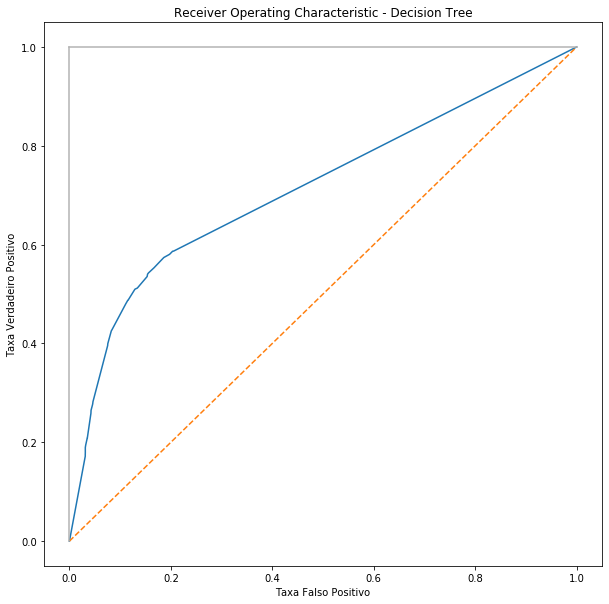

In [534]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para XGBoost

In [535]:
XGB_score = XGB_model.predict_proba(X_test)[:,1]

In [536]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, XGB_score)

In [537]:
print('roc_auc_score para XGBoost: ', roc_auc_score(y_test, XGB_score))

roc_auc_score para XGBoost:  0.7102467230614924


In [538]:
auc_list.append(['XGBoost', roc_auc_score(y_test, XGB_score)])

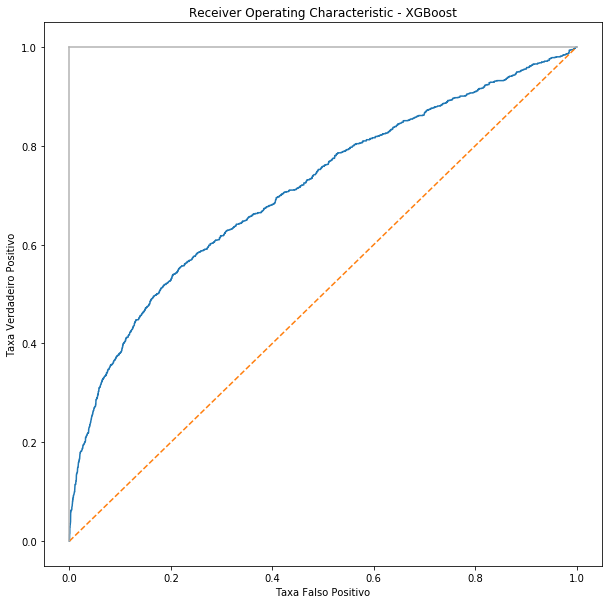

In [539]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para Random Forest 

In [540]:
clf_score = clf.predict_proba(X_test)[:,1]

In [541]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, clf_score)

In [542]:
print('roc_auc_score para Random Forest: ', roc_auc_score(y_test, clf_score))

roc_auc_score para Random Forest:  0.7736198493270643


In [543]:
auc_list.append(['Random Forest', roc_auc_score(y_test, clf_score)])

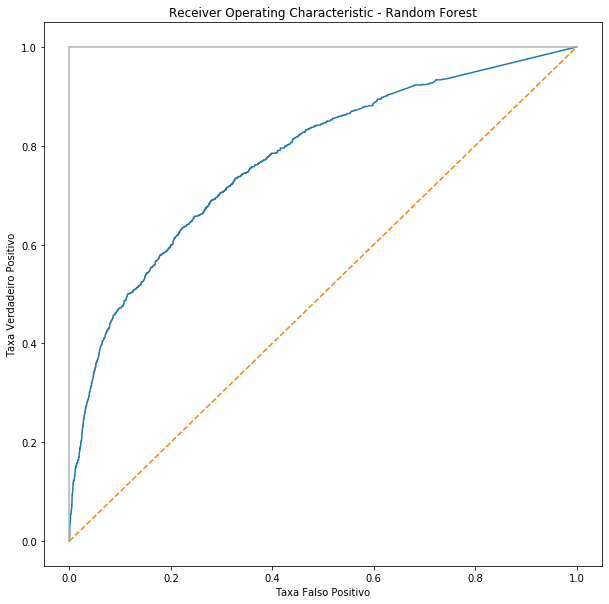

In [544]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para SVM

In [545]:
svm_score = svm_model.predict_proba(X_test)[:,1]

In [546]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, svm_score)

In [547]:
print('roc_auc_score para SVM: ', roc_auc_score(y_test, svm_score))

roc_auc_score para SVM:  0.5082352273255124


In [548]:
auc_list.append(['SVM', roc_auc_score(y_test, svm_score)])

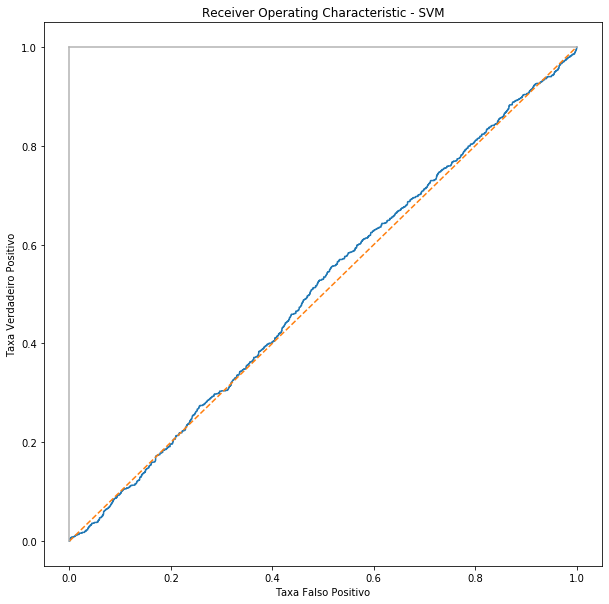

In [549]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para Naïve Bayes - Dados Balanceados - SMOTE

In [550]:
naive_bayes_score_balanced = gnb_balanced.predict_proba(X_test)[:,1]

In [551]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, naive_bayes_score_balanced)

In [552]:
print('roc_auc_score para Naïve Bayes: ', roc_auc_score(y_test, naive_bayes_score_balanced))

roc_auc_score para Naïve Bayes:  0.5175995554477436


In [553]:
auc_list.append(['Naïve Bayes - SMOTE', roc_auc_score(y_test, naive_bayes_score_balanced)])

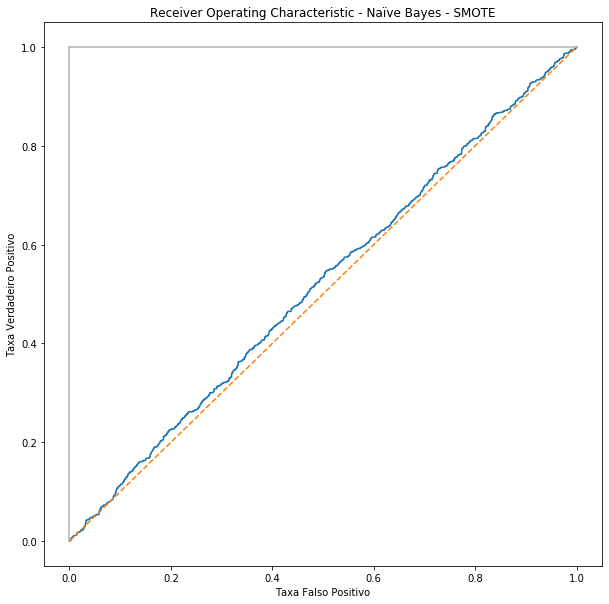

In [554]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naïve Bayes - SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para Decision Tree - Dados Balanceados - SMOTE

In [555]:
tree_balanced_score = tree_status_balanced.predict_proba(X_test)[:,1]

In [556]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, tree_balanced_score)

In [557]:
print('roc_auc_score para Decision Tree: ', roc_auc_score(y_test, tree_balanced_score))

roc_auc_score para Decision Tree:  0.7223144501848573


In [558]:
auc_list.append(['Decision Tree - SMOTE', roc_auc_score(y_test, tree_balanced_score)])

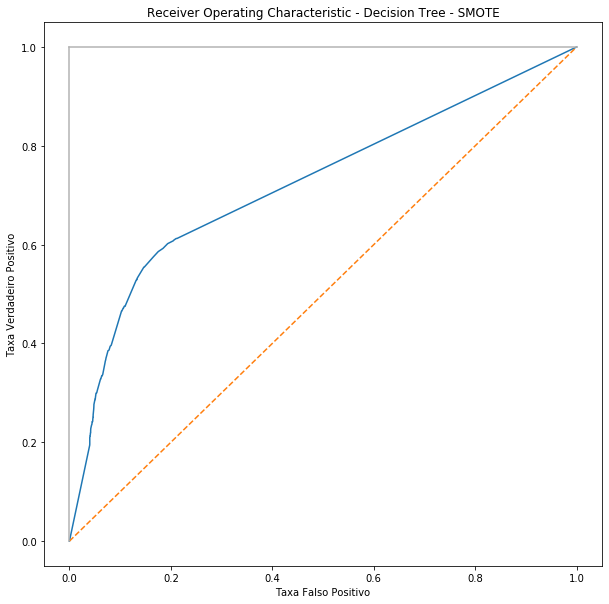

In [559]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree - SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para Decision Tree - Dados Balanceados - class_weight="balanced"

In [560]:
tree_balanced_weight_score = tree_status_balanced_weight.predict_proba(X_test)[:,1]

In [561]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, tree_balanced_weight_score)

In [562]:
print('roc_auc_score para Decision Tree: ', roc_auc_score(y_test, tree_balanced_weight_score))

roc_auc_score para Decision Tree:  0.7123868619668684


In [563]:
auc_list.append(['Decision Tree - class_weight', roc_auc_score(y_test, tree_balanced_weight_score)])

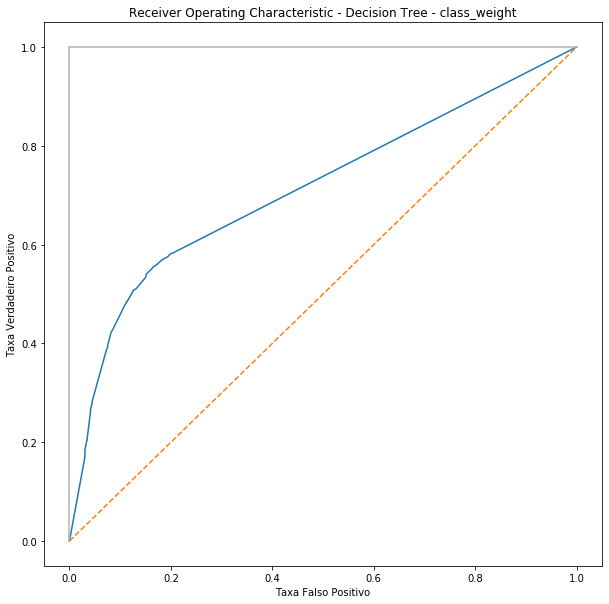

In [564]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree - class_weight')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para XGBoost - Dados Balanceados - SMOTE

In [565]:
XGB_balanced_score = XGB_model_balanced.predict_proba(X_test)[:,1]

In [566]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, XGB_balanced_score)

In [567]:
print('roc_auc_score para XGBoost: ', roc_auc_score(y_test, XGB_balanced_score))

roc_auc_score para XGBoost:  0.6820416113987052


In [568]:
auc_list.append(['XGBoost - SMOTE', roc_auc_score(y_test, XGB_balanced_score)])

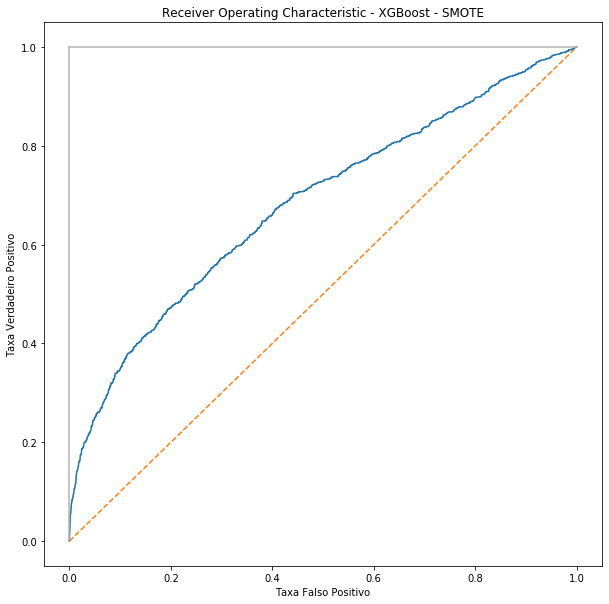

In [569]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost - SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para Random Forest - Dados Balanceados - SMOTE

In [570]:
random_forest_score = clf_balanced.predict_proba(X_test)[:,1]

In [571]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, random_forest_score)

In [572]:
print('roc_auc_score para Random Forest: ', roc_auc_score(y_test, random_forest_score))

roc_auc_score para Random Forest:  0.7736334835245562


In [573]:
auc_list.append(['Random Forest - SMOTE', roc_auc_score(y_test, random_forest_score)])

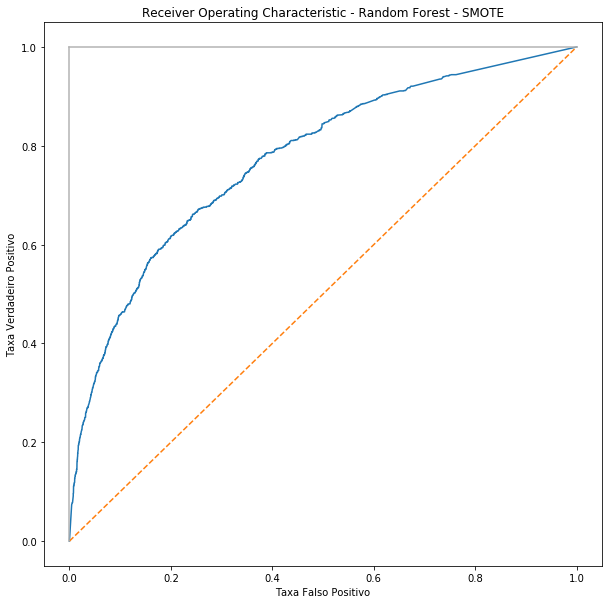

In [574]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest - SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para Random Forest - Dados Balanceados - class_weight="balanced"

In [575]:
random_forest_weighted_score = clf_balanced_weight.predict_proba(X_test)[:,1]

In [576]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, random_forest_weighted_score)

In [577]:
print('roc_auc_score para Random Forest: ', roc_auc_score(y_test, random_forest_weighted_score))

roc_auc_score para Random Forest:  0.7722282579710594


In [578]:
auc_list.append(['Random Forest - class_weight', roc_auc_score(y_test, random_forest_weighted_score)])

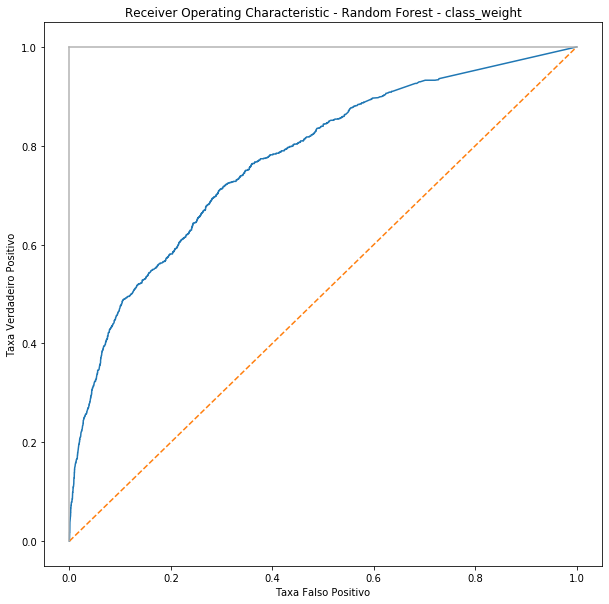

In [579]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest - class_weight')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para SVM - Dados Balanceados - SMOTE

In [580]:
svm_balanced_score = svm_model_balanced.predict_proba(X_test)[:,1]

In [581]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, svm_balanced_score)

In [582]:
print('roc_auc_score para SVM: ', roc_auc_score(y_test, svm_balanced_score))

roc_auc_score para SVM:  0.5067644113897591


In [583]:
auc_list.append(['SVM - SMOTE', roc_auc_score(y_test, svm_balanced_score)])

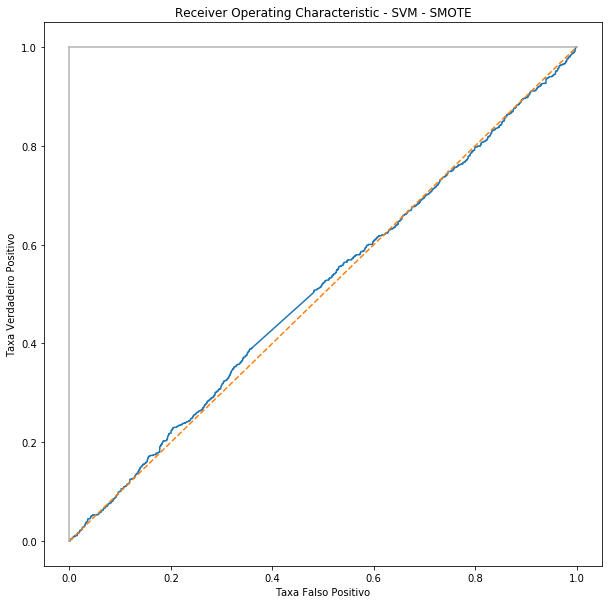

In [584]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM - SMOTE')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

### Curva ROC e AUC para SVM - Dados Balanceados - class_weight="balanced"

In [585]:
svm_balanced_weight_score = svm_model_balanced_weight.predict_proba(X_test)[:,1]

In [586]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, svm_balanced_weight_score)

In [587]:
print('roc_auc_score para SVM: ', roc_auc_score(y_test, svm_balanced_weight_score))

roc_auc_score para SVM:  0.507317134014269


In [588]:
auc_list.append(['SVM - class_weight', roc_auc_score(y_test, svm_balanced_weight_score)])

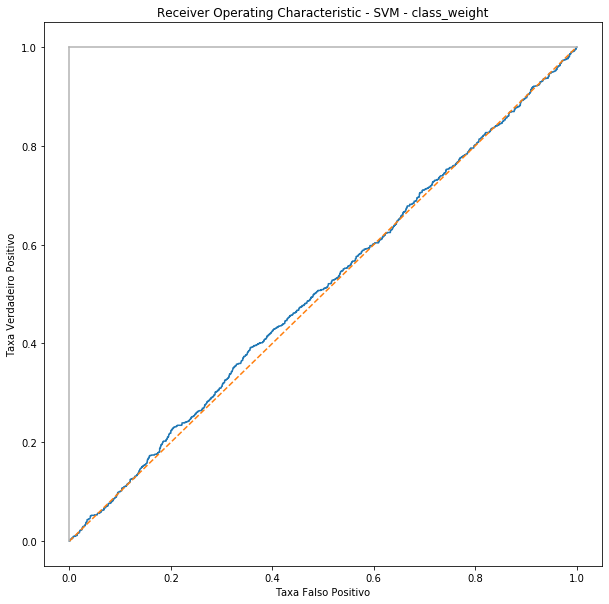

In [589]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM - class_weight')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.show()

In [590]:
# Transformando a lista em dataframe
df_auc = pd.DataFrame(auc_list, columns = ['Modelo', 'AUC'])

In [631]:
df_auc

,Modelo,AUC
0,Naïve Bayes,0.522203
1,Decision Tree,0.713356
2,XGBoost,0.710247
3,Random Forest,0.773620
4,SVM,0.508235
5,Naïve Bayes - SMOTE,0.517600
6,Decision Tree - SMOTE,0.722314
7,Decision Tree - class_weight,0.712387
8,XGBoost - SMOTE,0.682042
9,Random Forest - SMOTE,0.773633


In [592]:
# Separando os maiores 5 AUC do dataframe
largest_5_auc = df_auc.nlargest(5, "AUC")

In [593]:
largest_5_auc

,Modelo,AUC
9,Random Forest - SMOTE,0.773633
3,Random Forest,0.773620
10,Random Forest - class_weight,0.772228
6,Decision Tree - SMOTE,0.722314
1,Decision Tree,0.713356


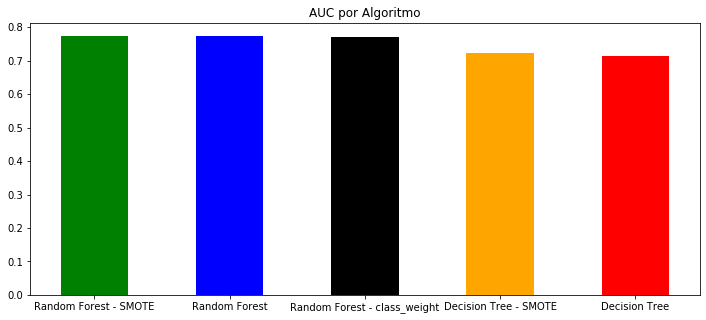

In [594]:
# Gráfico representando as 5 maiores AUC por algoritmo
plt.figure(figsize=(12,5))
plt.bar(largest_5_auc['Modelo'], 
        largest_5_auc['AUC'], 
        width=0.5, color=['green', 'blue', 'black', 'orange', 'red'])
plt.title('AUC por Algoritmo')
plt.show()

### É observado que o modelo que apresentou a maior AUC é o Random Forest após ter os dados balanceados.

### Percebe-se que, após todos os aprendizados pelos algoritmos, a métrica de acurácia, assim como as curvas ROC, podem enganar bastante na escolha do melhor modelo, pelo motivo de existir um grande desbalanceamento no conjunto de dados de validação. Pelo propósito do projeto ser identificar o maior número de prováveis inadimplentes, busca-se o maior recall para a classe em questão. E por que isso? Imaginando que existe o cenário de:

### Positivo: Atraso
### Negativo: Em dia

### O recall pode ser usado em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os consumidores inadimplentes, mesmo que classifique alguns "em dia" como inadimplentes (situação de Falso Positivo) no processo.

### Em outras palavras, um consumidor em atraso ser classificado como "em dia" é mais prejudicial do que um consumidor "em dia" ser classificado como em atraso. 

### Para uma empresa que fornece crédito, o recall de inadimplentes torna-se valioso por determinar um limiar de probabilidade de atraso em que se torna seguro fornecer crédito para determinado consumidor. Dessa forma, o modelo que atingiu melhor desempenho foi o Naïve Bayes, com um recall de 73%.

### Gráfico apresentando os recalls dos modelos

In [595]:
df_recalls = pd.DataFrame(recalls, columns = ['Modelo', 'Recall Score'])

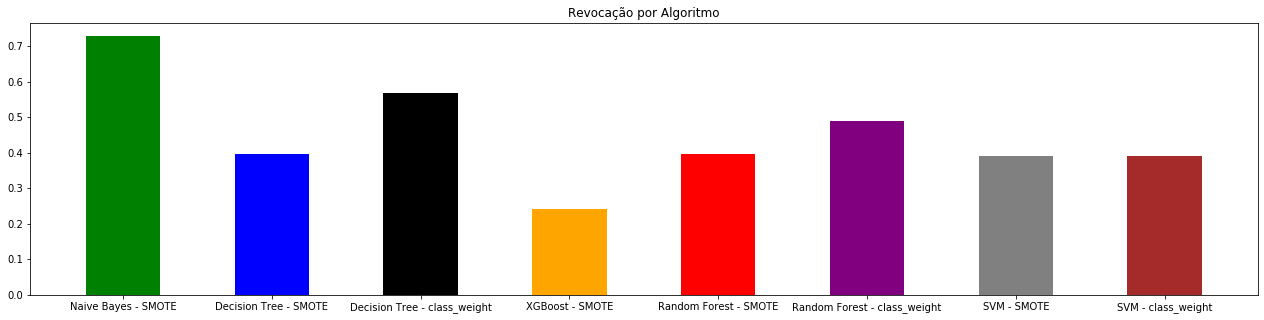

In [616]:
# Gráfico representando as revocações por algoritmo
plt.figure(figsize=(22,5))
plt.bar(df_recalls['Modelo'], 
        df_recalls['Recall Score'], 
        width=0.5, color=['green', 'blue', 'black', 'orange', 'red', 'purple', 'gray', 'brown'])
plt.title('Revocação por Algoritmo')
plt.show()

### A maior revocação, contudo, representa a melhor via? A seguir, serão evidenciadas as matrizes de confusão para que seja possível esclarecer melhor este tópico. 

### Exibição das matrizes de confusão por modelo

### Matriz de Confusão - Naïve Bayes - SMOTE

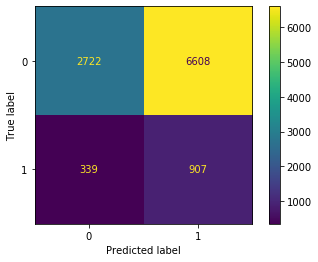

In [597]:
plot_confusion_matrix(gnb_balanced, X_test, y_test)  
plt.show()  

### Matriz de Confusão - Decision Tree - SMOTE

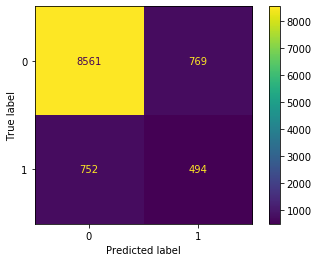

In [617]:
plot_confusion_matrix(tree_status_balanced, X_test, y_test)  
plt.show() 

### Matriz de Confusão - Decision Tree - class_weight

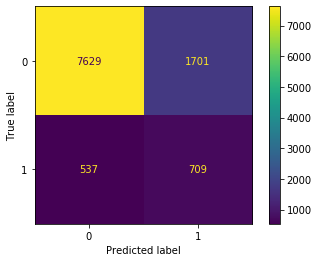

In [618]:
plot_confusion_matrix(tree_status_balanced_weight, X_test, y_test)  
plt.show() 

### Matriz de Confusão - XGBoost - SMOTE

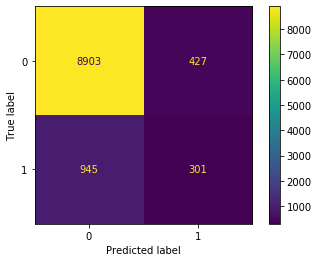

In [619]:
plot_confusion_matrix(XGB_model_balanced, X_test, y_test)  
plt.show() 

### Matriz de Confusão - Random Forest - SMOTE

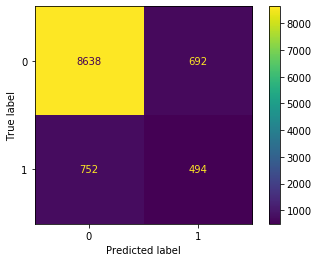

In [620]:
plot_confusion_matrix(clf_balanced, X_test, y_test)  
plt.show() 

### Matriz de Confusão - Random Forest - class_weight

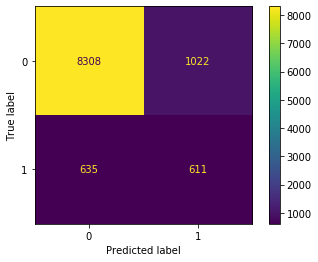

In [621]:
plot_confusion_matrix(clf_balanced_weight, X_test, y_test)  
plt.show() 

### Matriz de Confusão - SVM - SMOTE

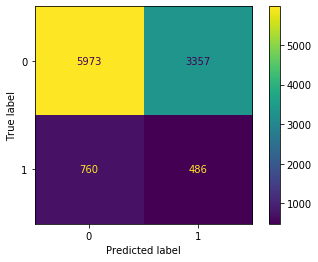

In [622]:
plot_confusion_matrix(svm_model_balanced, X_test, y_test)  
plt.show()

### Matriz de Confusão - SVM - class_weight

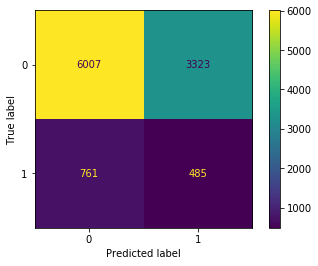

In [623]:
plot_confusion_matrix(svm_model_balanced_weight, X_test, y_test)  
plt.show()

### Mesmo com uma revocação de 73%, o algoritmo Naïve Bayes não representa o melhor modelo para aprovação de crédito, pois, pelo visto na figura "Matriz de Confusão - Naïve Bayes - SMOTE", dos 9330 clientes adimplentes, 70% (6608) foram classificados como potenciais clientes devedores, o que pode não ser tão vantajoso para uma instituição que fornece crédito, pois juros por atraso na fatura, e compras feitas pelo cartão geram lucros, os quais não aconteceriam se o algoritmo classificasse muitos clientes, que seriam adimplentes, como em atraso, e, por conta disso, não fornecesse crédito a eles.  

### Analisando a segunda maior revocação, 57%, para classe de devedores, o algoritmo Decision Tree com hiperparâmetro class_weight ajustado representa o melhor cenário. Uma vez que dos mesmos 9330 clientes com pagamento em dia, apenas 18% foram classificados como potenciais devedores. 